In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('digital_wallet_transactions.csv')

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Display information about the DataFrame, including data types and non-null values
print("\nDataFrame information:")
df.info()

First 5 rows of the DataFrame:
| idx   | transaction_id                       | user_id    | transaction_date   | product_category   | product_name              | merchant_name    | product_amount   | transaction_fee   | cashback   | loyalty_points   | payment_method   | transaction_status   | merchant_id   | device_type   | location   |
|:------|:-------------------------------------|:-----------|:-------------------|:-------------------|:--------------------------|:-----------------|:-----------------|:------------------|:-----------|:-----------------|:-----------------|:---------------------|:--------------|:--------------|:-----------|
| 1     | 4dac3ea3-6492-46ec-80b8-dc45c3ad0b14 | USER_05159 | 2023-08-19 03:32   | Rent Payment       | 2BHK Flat Deposit         | Airbnb           | 1525.39          | 36.69             | 19.19      | 186              | Debit Card       | Successful           | MERCH_0083    | iOS           | Urban      |
| 2     | a903ed9f-eb84-47e7-b8aa-fd1786c9

In [2]:
# Convert 'transaction_date' to datetime format
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Calculate the count of each transaction status
status_counts = df['transaction_status'].value_counts()

# Calculate the total number of transactions
total_transactions = status_counts.sum()

# Calculate the percentage for each status
status_percentages = (status_counts / total_transactions) * 100

print("Transaction Status Counts:")
print(status_counts.to_markdown(numalign="left", stralign="left"))

print("\nTransaction Status Percentages:")
print(status_percentages.to_markdown(numalign="left", stralign="left"))

Transaction Status Counts:
| transaction_status   | count   |
|:---------------------|:--------|
| Successful           | 4755    |
| Failed               | 146     |
| Pending              | 99      |

Transaction Status Percentages:
| transaction_status   | count   |
|:---------------------|:--------|
| Successful           | 95.1    |
| Failed               | 2.92    |
| Pending              | 1.98    |


Başarısız işlem oranlarını inceledik. Toplam işlemlerin %2.92'si başarısız, %1.98'i ise beklemede durumunda. Bu, genel olarak sistemin oldukça başarılı çalıştığını gösteriyor.

In [3]:
# Group by 'payment_method' and count the transaction statuses
payment_method_status_counts = df.groupby('payment_method')['transaction_status'].value_counts().unstack(fill_value=0)

# Calculate total transactions per payment method
payment_method_status_counts['Total'] = payment_method_status_counts.sum(axis=1)

# Calculate the failure rate for each payment method
payment_method_status_counts['Failed_Rate (%)'] = (payment_method_status_counts['Failed'] / payment_method_status_counts['Total']) * 100

# Calculate the pending rate for each payment method
payment_method_status_counts['Pending_Rate (%)'] = (payment_method_status_counts['Pending'] / payment_method_status_counts['Total']) * 100

print("Payment Method Performance:")
print(payment_method_status_counts.to_markdown(numalign="left", stralign="left"))

Payment Method Performance:
| payment_method   | Failed   | Pending   | Successful   | Total   | Failed_Rate (%)   | Pending_Rate (%)   |
|:-----------------|:---------|:----------|:-------------|:--------|:------------------|:-------------------|
| Bank Transfer    | 29       | 18        | 998          | 1045    | 2.77512           | 1.72249            |
| Credit Card      | 35       | 24        | 933          | 992     | 3.52823           | 2.41935            |
| Debit Card       | 25       | 9         | 988          | 1022    | 2.44618           | 0.880626           |
| UPI              | 25       | 24        | 950          | 999     | 2.5025            | 2.4024             |
| Wallet Balance   | 32       | 24        | 886          | 942     | 3.39703           | 2.54777            |


Ödeme kanalı performans analizine göre, 'Debit Card' en düşük başarısızlık oranına (%2.45) sahipken, 'Credit Card' en yüksek başarısızlık oranına (%3.53) sahiptir. Bu, 'Debit Card' yönteminin en güvenilir ödeme kanalı olduğunu gösteriyor.

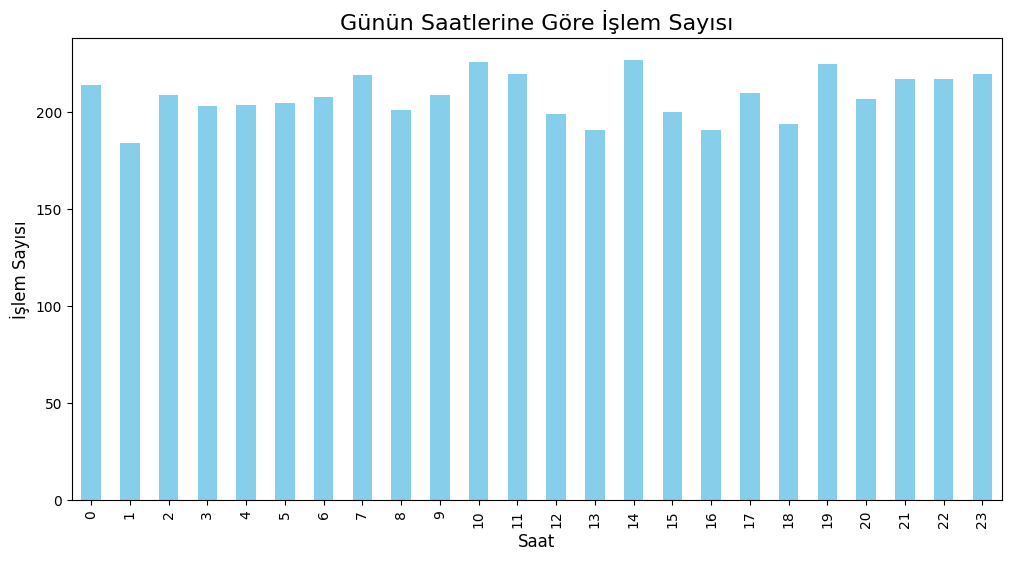

Hourly Transaction Counts:
| transaction_hour   | count   |
|:-------------------|:--------|
| 0                  | 214     |
| 1                  | 184     |
| 2                  | 209     |
| 3                  | 203     |
| 4                  | 204     |
| 5                  | 205     |
| 6                  | 208     |
| 7                  | 219     |
| 8                  | 201     |
| 9                  | 209     |
| 10                 | 226     |
| 11                 | 220     |
| 12                 | 199     |
| 13                 | 191     |
| 14                 | 227     |
| 15                 | 200     |
| 16                 | 191     |
| 17                 | 210     |
| 18                 | 194     |
| 19                 | 225     |
| 20                 | 207     |
| 21                 | 217     |
| 22                 | 217     |
| 23                 | 220     |


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the hour from 'transaction_date'
df['transaction_hour'] = df['transaction_date'].dt.hour

# Count the number of transactions per hour
hourly_transactions = df['transaction_hour'].value_counts().sort_index()

# Create a bar chart for hourly transactions
plt.figure(figsize=(12, 6))
hourly_transactions.plot(kind='bar', color='skyblue')
plt.title('Günün Saatlerine Göre İşlem Sayısı', fontsize=16)
plt.xlabel('Saat', fontsize=12)
plt.ylabel('İşlem Sayısı', fontsize=12)
plt.show()

# Print the hourly transaction counts
print("Hourly Transaction Counts:")
print(hourly_transactions.to_markdown(numalign="left", stralign="left"))

### 1. Ürün Kategorisi Bazında Performans ###
Ürün Kategorisi Başarı ve Başarısızlık Oranları:
| product_category   | Failed   | Pending   | Successful   | Total   | Failed_Rate (%)   |
|:-------------------|:---------|:----------|:-------------|:--------|:------------------|
| Gaming Credits     | 11       | 6         | 214          | 231     | 4.7619            |
| Online Shopping    | 11       | 4         | 228          | 243     | 4.52675           |
| Internet Bill      | 10       | 7         | 216          | 233     | 4.29185           |
| Electricity Bill   | 10       | 2         | 240          | 252     | 3.96825           |
| Grocery Shopping   | 9        | 6         | 223          | 238     | 3.78151           |
| Rent Payment       | 9        | 3         | 239          | 251     | 3.58566           |
| Education Fee      | 10       | 0         | 276          | 286     | 3.4965            |
| Movie Ticket       | 8        | 7         | 257          | 272     | 2.94118        

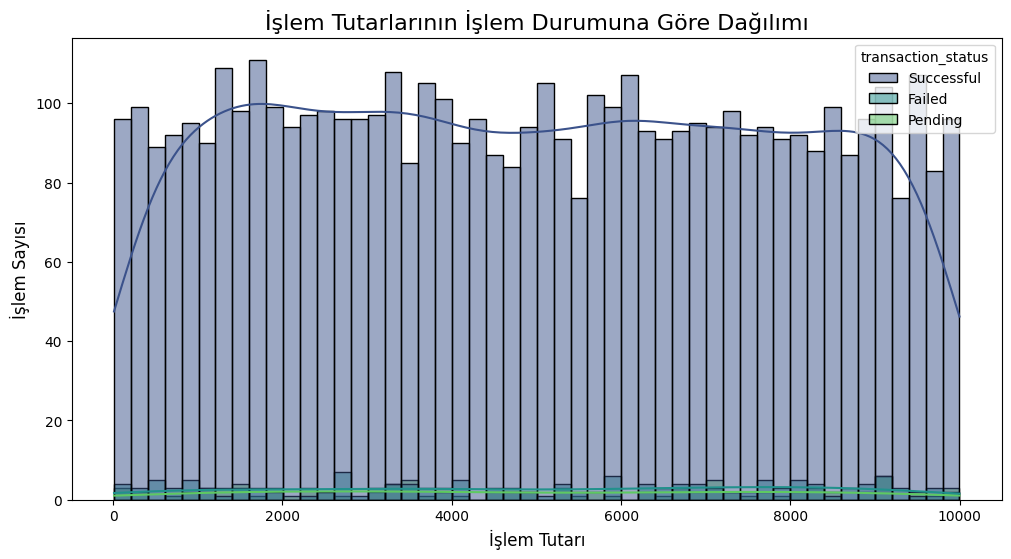


### 3. Kullanıcı ve Cihaz Bazlı Analiz ###
Cihaz Türüne Göre Başarısızlık Oranları:
| device_type   | Failed   | Pending   | Successful   | Total   | Failed_Rate (%)   |
|:--------------|:---------|:----------|:-------------|:--------|:------------------|
| Android       | 72       | 56        | 2867         | 2995    | 2.40401           |
| Web           | 20       | 10        | 449          | 479     | 4.17537           |
| iOS           | 54       | 33        | 1439         | 1526    | 3.53866           |

Konuma Göre Başarısızlık Oranları:
| location   | Failed   | Pending   | Successful   | Total   | Failed_Rate (%)   |
|:-----------|:---------|:----------|:-------------|:--------|:------------------|
| Rural      | 14       | 10        | 474          | 498     | 2.81124           |
| Suburban   | 28       | 17        | 972          | 1017    | 2.7532            |
| Urban      | 104      | 72        | 3309         | 3485    | 2.98422           |


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('digital_wallet_transactions.csv')

# Convert 'transaction_date' to datetime format, if not already done
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# --- 1. Ürün Kategorisi ve Satıcı Performansı Analizi ---
print("### 1. Ürün Kategorisi Bazında Performans ###")

# Group by 'product_category' and count the transaction statuses
category_status_counts = df.groupby('product_category')['transaction_status'].value_counts().unstack(fill_value=0)

# Calculate total transactions per category
category_status_counts['Total'] = category_status_counts.sum(axis=1)

# Calculate the failure rate for each category
category_status_counts['Failed_Rate (%)'] = (category_status_counts['Failed'] / category_status_counts['Total']) * 100

print("Ürün Kategorisi Başarı ve Başarısızlık Oranları:")
print(category_status_counts.sort_values(by='Failed_Rate (%)', ascending=False).to_markdown(numalign="left", stralign="left"))


# --- 2. İşlem Tutarı Analizi ---
print("\n### 2. İşlem Tutarı Analizi ###")

# Descriptive statistics for product_amount
print("product_amount Dağılımı:")
print(df['product_amount'].describe().to_markdown(numalign="left", stralign="left"))

# Average transaction amount by status
avg_amount_by_status = df.groupby('transaction_status')['product_amount'].mean()
print("\nİşlem Durumuna Göre Ortalama İşlem Tutarı:")
print(avg_amount_by_status.to_markdown(numalign="left", stralign="left"))

# Visualize the distribution of transaction amounts for successful vs failed transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='product_amount', hue='transaction_status', bins=50, kde=True, palette='viridis')
plt.title('İşlem Tutarlarının İşlem Durumuna Göre Dağılımı', fontsize=16)
plt.xlabel('İşlem Tutarı', fontsize=12)
plt.ylabel('İşlem Sayısı', fontsize=12)
plt.show()
# --- 3. Kullanıcı ve Cihaz Bazlı Analiz ---
print("\n### 3. Kullanıcı ve Cihaz Bazlı Analiz ###")

# Analyze by device_type
device_status_counts = df.groupby('device_type')['transaction_status'].value_counts().unstack(fill_value=0)
device_status_counts['Total'] = device_status_counts.sum(axis=1)
device_status_counts['Failed_Rate (%)'] = (device_status_counts['Failed'] / device_status_counts['Total']) * 100
print("Cihaz Türüne Göre Başarısızlık Oranları:")
print(device_status_counts.to_markdown(numalign="left", stralign="left"))

# Analyze by location
location_status_counts = df.groupby('location')['transaction_status'].value_counts().unstack(fill_value=0)
location_status_counts['Total'] = location_status_counts.sum(axis=1)
location_status_counts['Failed_Rate (%)'] = (location_status_counts['Failed'] / location_status_counts['Total']) * 100
print("\nKonuma Göre Başarısızlık Oranları:")
print(location_status_counts.to_markdown(numalign="left", stralign="left"))

Dijital Cüzdan İşlem Verilerinin Ön İşlenmesi ve Özellik Analizi"

Proje Özeti:
Bu projede, dijital cüzdan işlem verileri üzerinde veri ön işleme adımları uygulanarak, kategorik değişkenler sayısal formata dönüştürülmüş ve işlem durumunu etkileyen önemli özellikler tespit edilmiştir. Özellikle ürün kategorisi, ödeme yöntemi, cihaz türü ve işlem lokasyonu gibi kategorik veriler one-hot encoding yöntemiyle sayısal hale getirilmiş, işlem durumu ise sayısal olarak kodlanmıştır. Bu ön işlenmiş veriler kullanılarak Random Forest sınıflandırıcısı ile işlem durumunu etkileyen en önemli özellikler belirlenmiş ve model performansı değerlendirilmiştir. Projenin temel amacı, dijital cüzdan işlemlerini anlamak, veri kalitesini artırmak ve işlem durumunu etkileyen kritik faktörleri keşfetmektir.



Özet:
Bu projede, dijital cüzdan işlem verileri ön işlenerek kategorik değişkenler sayısallaştırılmıştır. Random Forest modeli ile işlem durumunu etkileyen önemli özellikler belirlenmiş ve veri analizi yapılmıştır. Amaç, işlemleri daha iyi anlamak ve kritik faktörleri tespit etmektir.